### Linear Regression - update- Amrita

Link to dataset:
https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university/data

Link to original notebook:
https://www.kaggle.com/code/yogesh239/analysis-of-university-admissions-data/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [61]:
df = pd.read_csv("data/adm_data.csv", index_col = 0)
#df = pd.read_csv("data/adm_data.csv")

In [62]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [64]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [65]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [66]:
print(df.columns)       # there are extra spaces after few columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [67]:
# removing extra spaces after columns "LOR" and "Chance of Admit"
df.columns = df.columns.str.strip()

# Verify the updated column names
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


In [68]:
# Correlation matrix
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

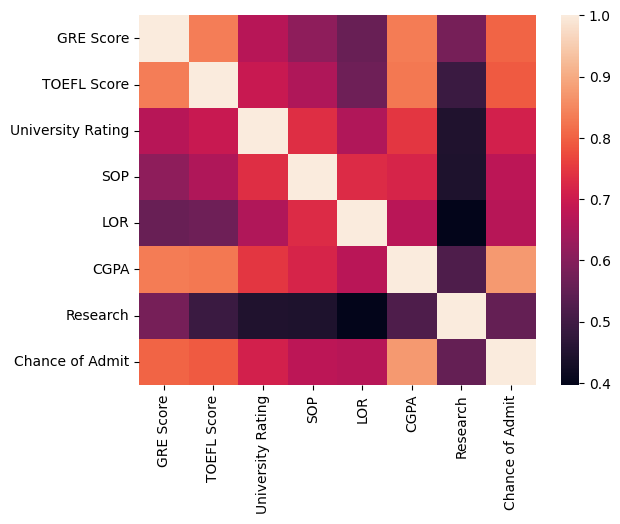

In [10]:
sns.heatmap(df.corr())

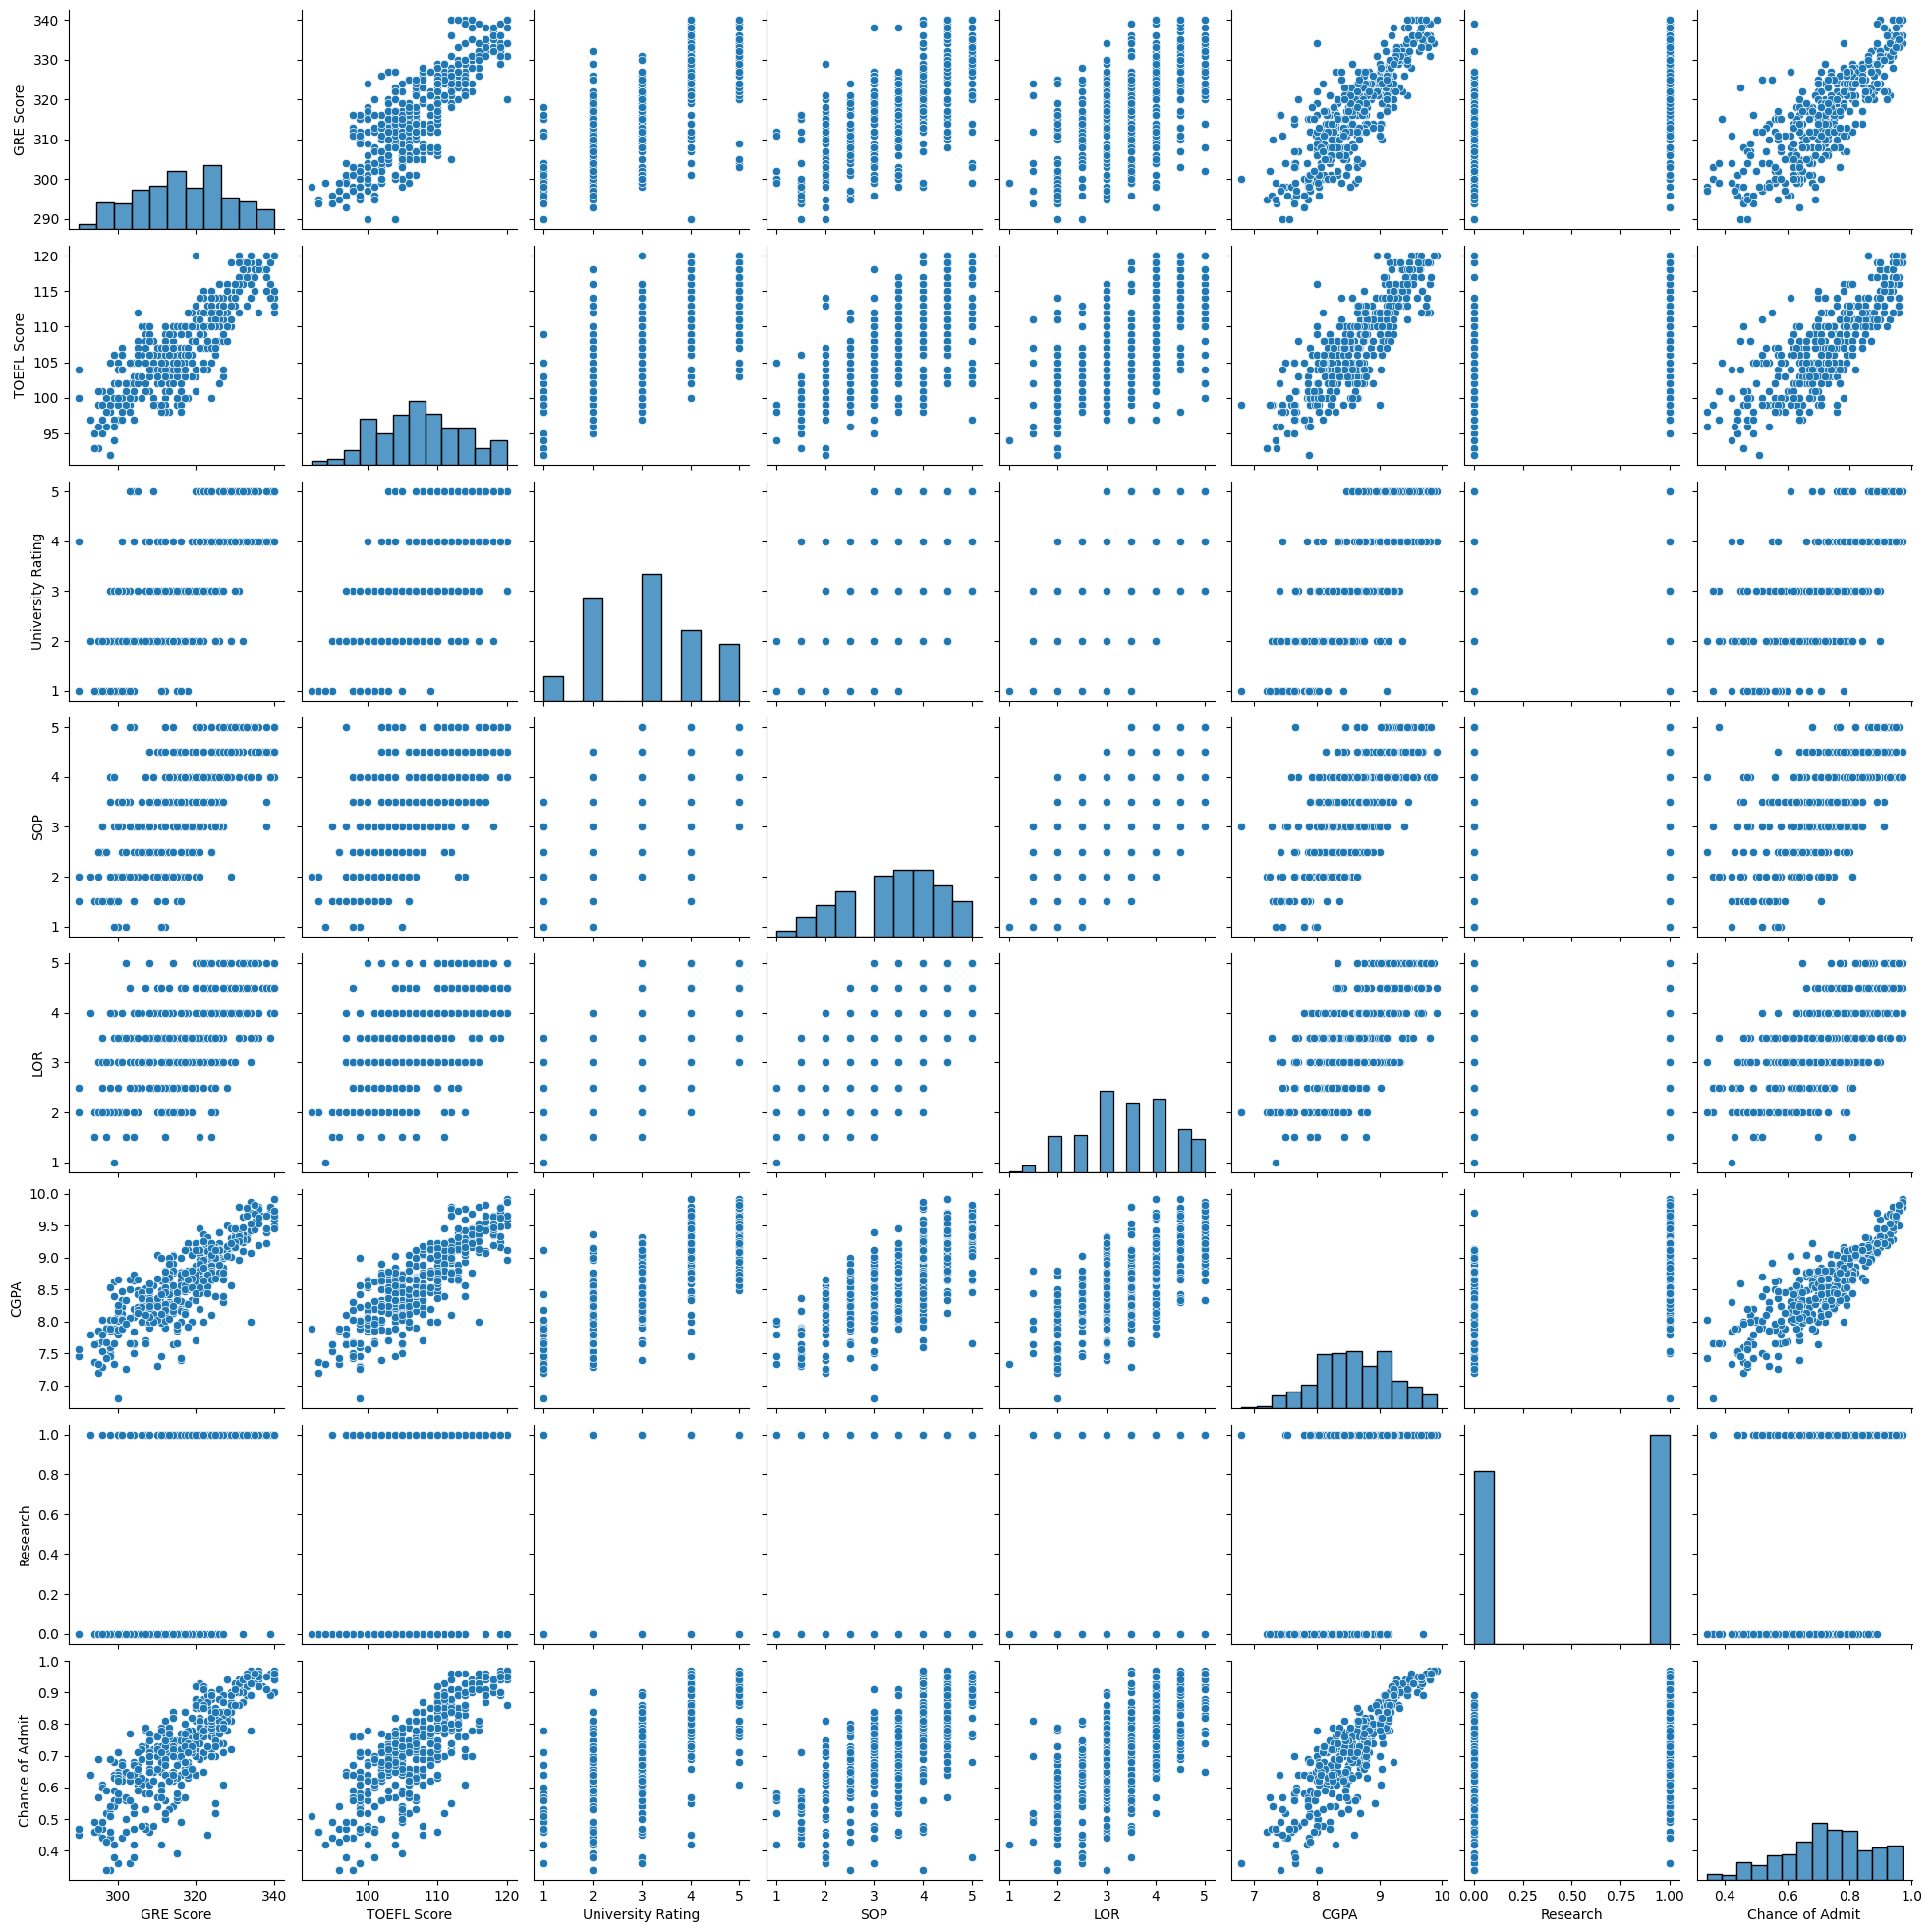

In [11]:
sns.pairplot(df)

In [20]:
# Splitting the dataset into dependent and independent variables; and test and train datasets.

X=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# create a linear regression object
lr=LinearRegression()

# fit the model
lr.fit(X_train,y_train)

# predict the values for test data
y_pred = lr.predict(X_test)

In [22]:
# Regression Score of the model
print('Score For Train Data : {}'.format(lr.score(X_train,y_train)))
print('Score For Test Data : {}'.format(lr.score(X_test,y_test)))

print('The mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('The mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Score For Train Data : 0.7951946003191085
Score For Test Data : 0.8212082591486991
The mean absolute error: 0.04795673362091195
The mean squared error: 0.004617003377285012
The root mean squared error: 0.06794853476922819


In [15]:
# Cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 10 folds
cv_scores = cross_val_score(lr, X, y, cv=10)

# Output the mean and standard deviation of the cross-validation scores
print(f"Cross-validation Mean Score: {cv_scores.mean()}")
print(f"Cross-validation Standard Deviation: {cv_scores.std()}")

Cross-validation Mean Score: 0.7703825020879943
Cross-validation Standard Deviation: 0.10709275694367823


### Applying polynomial regression with degree 2

In [23]:
X=df.drop(['Chance of Admit'],axis=1)       # Features
y=df['Chance of Admit']                     # Target variable

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degree = 2

# Initialize PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree)

# Transform the features to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the polynomial regression model
lr.fit(X_train_poly, y_train)

print(f"Score for Train Data: {lr.score(X_train_poly, y_train)}")
print(f"Score for Test Data: {lr.score(X_test_poly, y_test)}")

# Generate predictions for the training set
y_train_pred = lr.predict(X_train_poly)

# Predict the values on the test set
y_pred = lr.predict(X_test_poly)

print('The mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('The mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Score for Train Data: 0.8170449180109056
Score for Test Data: 0.8253834707740682
The mean absolute error: 0.04611160011322245
The mean squared error: 0.004509185387016428
The root mean squared error: 0.06715046825612185


In [17]:
# Create a pipeline with PolynomialFeatures and LinearRegression
polynomial_regression = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(polynomial_regression, X, y, cv=10, scoring='r2')

# Output the mean and standard deviation of the cross-validation scores
print(f"Cross-validation Mean Score: {cv_scores.mean()}")
print(f"Cross-validation Standard Deviation: {cv_scores.std()}")

Cross-validation Mean Score: 0.7367761560700553
Cross-validation Standard Deviation: 0.10918964639126487


### The following table is taken from the original notebook (with updated score for test data for linear regression model in brackets"0.8212") of this code which I choose to improve. Here it can be seen that that score for test data is highest when polynomial model is used (0.8254) and corresponding RMSE value is 0.0671 which is very low.

| Model     | Score For Test Data    | RMSE value
| ----------- | ----------- | --------------|
| Linear Regression    |    0.7952 (0.8212) | 0.0679 |
| Decision Tree Regression    | 0.6766 | 0.0914 |
| Random Forest Regression   | 0.8072 |  0.0706 |
| KNN    | 0.6535 | 0.0946 |
| XGBoost Regression   | 0.7991 | 0.0721 |

#### The score for test data with polynomial regression with degree 2 is 0.8254 which is higher than linear regression, which is a good sign and has a better fit for our model. Cross validation score (0.737) is less when compared with score for test data (0.8254) which tells us that there is room for improvement like feature engineering and hyperparameter tuning. If we increase the degree of polynomial to 3 or 4 it results in lower test data score which is due to overfitting so it is better to stay with degree 2. 

### Applying feature engineering to try make it even better:

In [90]:
# Feature Engineering:

# Made a copy of the original dataframe so features can be added or removed without affecting the original dataframe.
df_fe = df.copy()

# Creating interaction terms
df_fe['CGPA * GRE'] = df_fe['CGPA'] * df_fe['GRE Score']
df_fe['GRE * TOEFL'] = df_fe['GRE Score'] * df_fe['TOEFL Score']
df_fe['CGPA * TOEFL'] = df_fe['CGPA'] * df_fe['TOEFL Score']

# Scaling numeric features
scaler = StandardScaler()
scaled_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'CGPA * GRE','GRE * TOEFL','CGPA * TOEFL']
df_fe[scaled_features] = scaler.fit_transform(df_fe[scaled_features])

# Removing features with low correlation
df_fe.drop(['SOP','CGPA'], axis = 1, inplace= True) 

# Define the feature set (X) and the target variable (y)
X = df_fe.drop('Chance of Admit', axis=1)  # Dropping the target column
y = df_fe['Chance of Admit']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial
degree = 2

# Initialize the PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree)

# Transform the features to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the polynomial regression model
lr.fit(X_train_poly, y_train)

# Print the score for the training and testing data
print(f"Score for Train Data: {lr.score(X_train_poly, y_train)}")
print(f"Score for Test Data: {lr.score(X_test_poly, y_test)}")

# Generate predictions for the training and testing set
y_train_pred = lr.predict(X_train_poly)
y_pred = lr.predict(X_test_poly)

# Evaluate model performance using different metrics
print('The mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('The mean squared error:', metrics.mean_squared_error(y_test, y_pred))
print('The root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Score for Train Data: 0.8119695911263345
Score for Test Data: 0.8407897229095375
The mean absolute error: 0.04614653303362341
The mean squared error: 0.004111344201500343
The root mean squared error: 0.06411976451532198


### The above model is much better than the original model and gives us a score of 0.8408

In [173]:
# Create a pipeline with PolynomialFeatures and LinearRegression
polynomial_regression = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(polynomial_regression, X, y, cv=10, scoring='r2')

# Output the mean and standard deviation of the cross-validation scores
print(f"Cross-validation Mean Score: {cv_scores.mean()}")
print(f"Cross-validation Standard Deviation: {cv_scores.std()}")

Cross-validation Mean Score: 0.6317618937042698
Cross-validation Standard Deviation: 0.22810001525647083
